In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#LIBRARY SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [3]:
# Dataset is read here => STEP 2: DATA READING
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [4]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


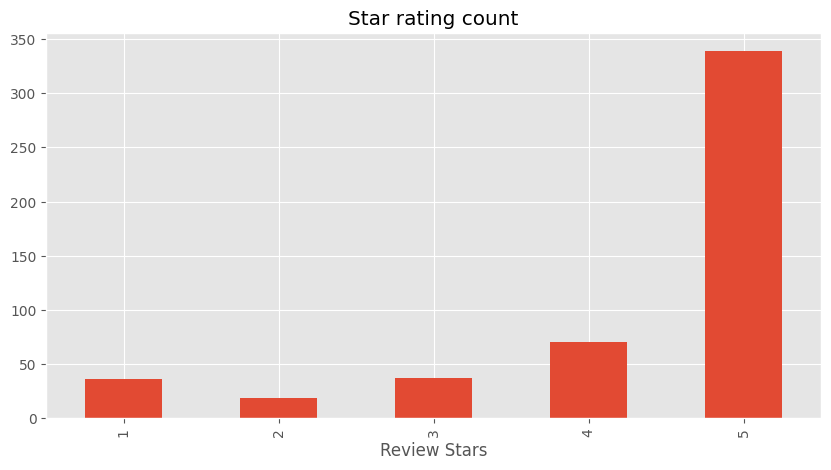

In [5]:
#Barplot for score reviews
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Star rating count',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
#STEP 3 =>DATA CLEANING
example = df['Text'][14]
print(example)


The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.


In [7]:
sample=df['Text'][0]
print(sample)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [8]:
#TOKENIZATION
tokens = nltk.word_tokenize(example)
tokens[:30]

['The',
 'Strawberry',
 'Twizzlers',
 'are',
 'my',
 'guilty',
 'pleasure',
 '-',
 'yummy',
 '.',
 'Six',
 'pounds',
 'will',
 'be',
 'around',
 'for',
 'a',
 'while',
 'with',
 'my',
 'son',
 'and',
 'I',
 '.']

In [9]:
# POS TAGGING
tagged = nltk.pos_tag(tokens)
tagged[:30]

[('The', 'DT'),
 ('Strawberry', 'NNP'),
 ('Twizzlers', 'NNPS'),
 ('are', 'VBP'),
 ('my', 'PRP$'),
 ('guilty', 'JJ'),
 ('pleasure', 'NN'),
 ('-', ':'),
 ('yummy', 'NN'),
 ('.', '.'),
 ('Six', 'NNP'),
 ('pounds', 'NNS'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('around', 'RB'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('while', 'NN'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('son', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('.', '.')]

In [10]:
#CHUNKING
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  (ORGANIZATION Strawberry/NNP)
  Twizzlers/NNPS
  are/VBP
  my/PRP$
  guilty/JJ
  pleasure/NN
  -/:
  yummy/NN
  ./.
  Six/NNP
  pounds/NNS
  will/MD
  be/VB
  around/RB
  for/IN
  a/DT
  while/NN
  with/IN
  my/PRP$
  son/NN
  and/CC
  I/PRP
  ./.)


In [12]:
#STEP 4:ANALYSIS OF DATA USING VADER
#Importing VADER Libraries
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sen = SentimentIntensityAnalyzer()


In [13]:
#POLARITY SCORE CALCULATION example
sen.polarity_scores('The ABC Facewash that I tried is really great!')
#since compound score is 0.6893,the feedback is considered to be positive!

{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.6893}

In [14]:
#RANDOM EXAMPLE
sen.polarity_scores('This is the worst thing ever.') #negative review

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [15]:
# Running function on "example"
print(example)
sen.polarity_scores(example) #positive review

The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.


{'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}

In [16]:
sen.polarity_scores(example)

{'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}

In [17]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sen.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
#Display of polarity score on entire dataset 
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [19]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


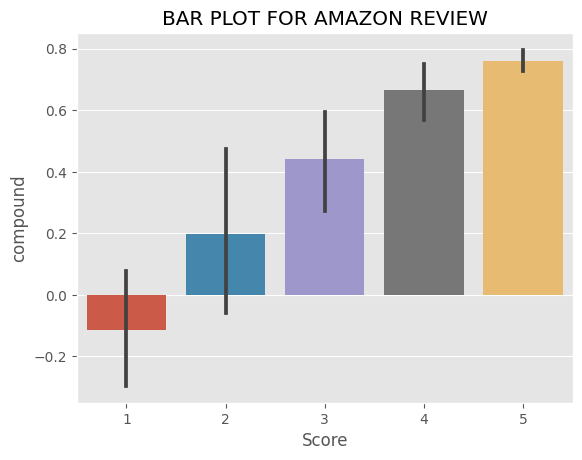

In [20]:
#Overall BARPLOT DISPLAY
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('BAR PLOT FOR AMAZON REVIEW')
plt.show()

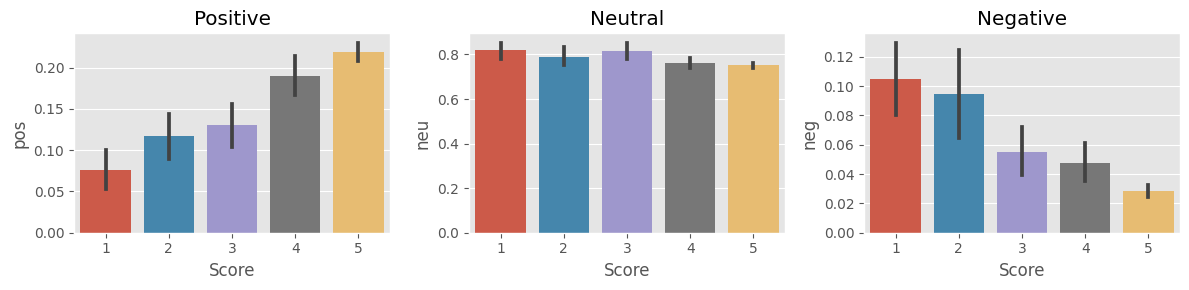

In [21]:
#Analysed plot view
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()